In [1]:
import numpy as np
from methods import *

### Schrittweitensensitivität

In [2]:
sigma = 10
rho = 28
beta = 8/3

f = LorenzSystem(sigma, rho, beta)

state0 = (1, 1, 1)

t1 = np.arange(0, 20, 1/100)
t2 = np.arange(0, 20, 1/200)
t3 = np.arange(0, 20, 1/1000)

states1 = ABM(f, state0, t1)
states2 = ABM(f, state0, t2)
states3 = ABM(f, state0, t3)

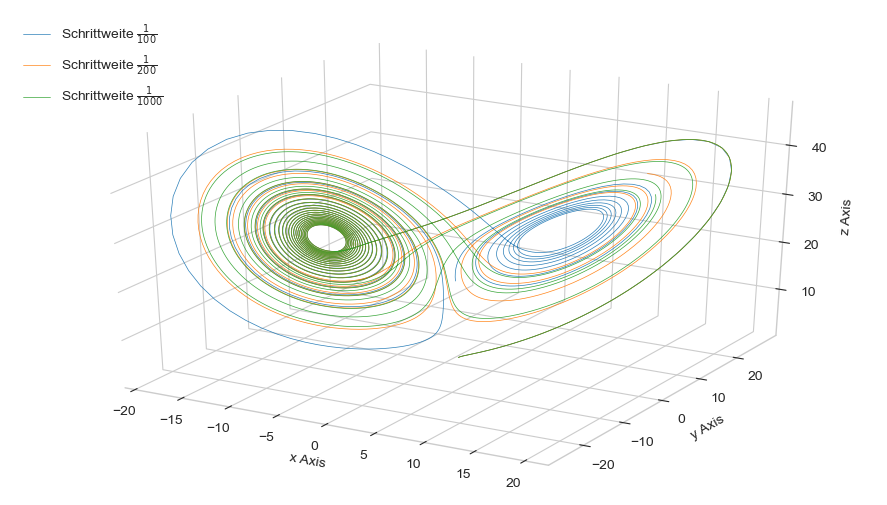

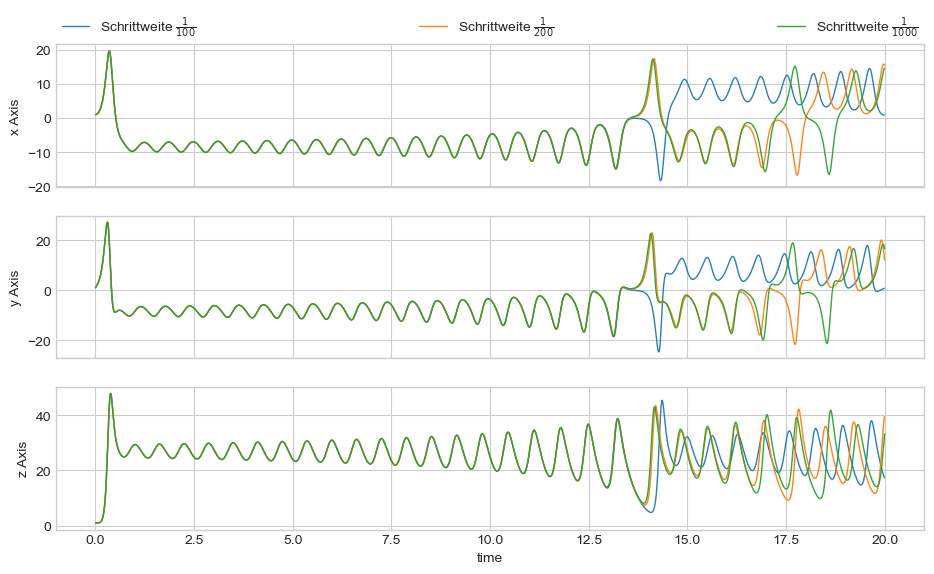

In [3]:
labels = (r"Schrittweite $\frac{1}{100}$", r"Schrittweite $\frac{1}{200}$", r"Schrittweite $\frac{1}{1000}$")

ParametricPlot(states1, states2, states3, labels=labels, fname="PC_stepsize_paramplot.png")
Plot((t1, t2, t3), states1, states2, states3, labels=labels, sameAxis=False, fname="PC_stepsize_compplot.png")

### Chaos

In [19]:
sigma = 10
rho = 28
beta = 8/3

f = LorenzSystem(sigma, rho, beta)

h = 1/1000

state1 = (1, 1, 1)
state2 = (1+h, 1+h, 1+h)

t = np.arange(0, 20, h)

states1 = ABM(f, state1, t)
states2 = ABM(f, state2, t)

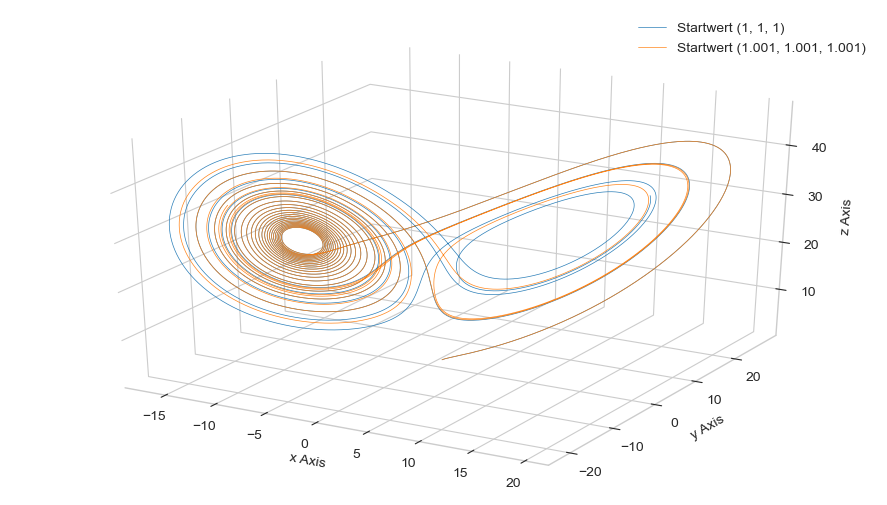

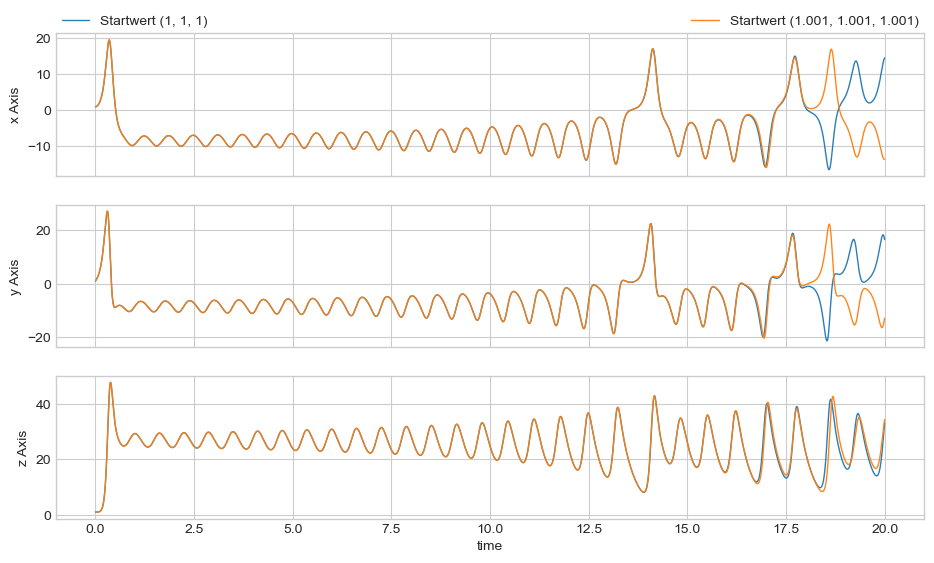

In [20]:
labels = (f"Startwert {state1}", f"Startwert {state2}")

ParametricPlot(states1, states2, labels=labels)
Plot(t, states1, states2, labels=labels)

### Datenexport

In [18]:
sigma = 10
rho = 28
beta = 8/3

f = LorenzSystem(sigma, rho, beta)

h = 1/100
t = np.arange(0, 50, h)
state1 = (1, 1, 1)

data = ABM(f, state1, t)

#np.savetxt("PC_data.txt", data, fmt="%.16f", delimiter=",", newline="],\n[")